In [1]:
import json

import plot_likert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results_file = 'survey_results.json'
with open(results_file, 'r') as results_f:
	results = json.load(results_f)

In [3]:
kg_quests = 0
no_kg_quests = 0
similar = 0

for k, v in results.items():
	similar += v['pick_counts']['similar']
	kg_quests += v['pick_counts']['kg']
	no_kg_quests += v['pick_counts']['no_kg']
 
total = kg_quests + no_kg_quests + similar

In [4]:
print('KG quests pick count:\t\t|\t', kg_quests)
print('No KG quests pick count:\t|\t', no_kg_quests)
print('"Both Similar" pick count:\t|\t', similar)
print('--------------------------------|-------------')
print('Total num of quests:\t\t|\t', total)

KG quests pick count:		|	 146
No KG quests pick count:	|	 37
"Both Similar" pick count:	|	 37
--------------------------------|-------------
Total num of quests:		|	 220


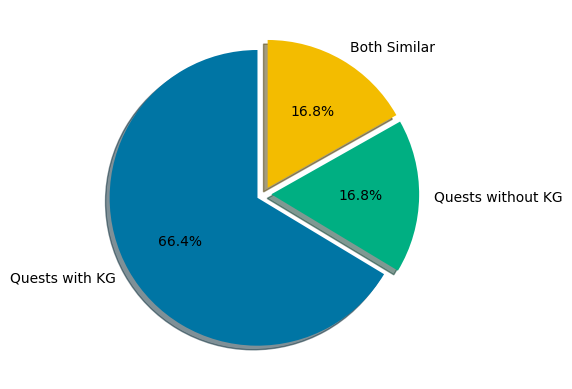

In [18]:
explode = (0.05, 0.05, 0.05)
fig, ax = plt.subplots()
ax.pie([kg_quests, no_kg_quests, similar], 
       labels=['Quests with KG', 'Quests without KG', 'Both Similar'],
       colors=['#0075a4', '#00af82', '#f3bc00'],
       autopct='%1.1f%%',
       explode=explode,
       shadow=True, 
       startangle=90)
plt.show()

In [5]:
print(f'% picked quest A:\t{kg_quests*100/total:.2f}')
print(f'% picked quest B:\t{no_kg_quests*100/total:.2f}')
print(f'% picked both similar:\t{similar*100/total:.2f}')

% picked quest A:	66.36
% picked quest B:	16.82
% picked both similar:	16.82


In [6]:
columns = ['Relatedness', 'Contradiction', 'Coherence', 'Value']
questions_arr = list(results.keys())

likert_mapping = {
    'Strongly Agree': plot_likert.scales.agree[4],
    'Agree': plot_likert.scales.agree[3],
    'Neutral': plot_likert.scales.agree[2],
    'Disagree': plot_likert.scales.agree[1],
    'Strongly Disagree': plot_likert.scales.agree[0]
}

likert_values = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree' ]

likert_value_mapping = {
    'Strongly agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly disagree': 1
}

In [7]:
kg_data = pd.read_csv('kg_outputs.tsv', sep='\t')
k = kg_data.map(lambda x:likert_value_mapping[x])
kg_data

,Relatedness,Contradiction,Coherence,Value
0,Strongly agree,Strongly disagree,Strongly agree,Strongly agree
1,Agree,Agree,Disagree,Neutral
2,Agree,Disagree,Disagree,Neutral
3,Strongly agree,Strongly disagree,Agree,Strongly agree
4,Strongly agree,Strongly disagree,Strongly agree,Strongly agree
...,...,...,...,...
215,Strongly agree,Strongly disagree,Agree,Agree
216,Strongly agree,Strongly disagree,Strongly agree,Strongly agree
217,Strongly agree,Strongly disagree,Strongly agree,Strongly agree
218,Agree,Disagree,Agree,Agree


In [8]:
for column in kg_data.columns:
    print(kg_data[column].value_counts())
    print(np.average(k[column]), '\n')

Relatedness
Strongly agree       119
Agree                 69
Disagree              18
Neutral               12
Strongly disagree      2
Name: count, dtype: int64
4.295454545454546 

Contradiction
Strongly disagree    85
Disagree             62
Agree                33
Neutral              28
Strongly agree       12
Name: count, dtype: int64
2.2045454545454546 

Coherence
Strongly agree       79
Agree                78
Disagree             41
Neutral              17
Strongly disagree     5
Name: count, dtype: int64
3.840909090909091 

Value
Strongly agree       89
Agree                82
Neutral              28
Disagree             17
Strongly disagree     4
Name: count, dtype: int64
4.068181818181818 



/home/manish/miniconda3/envs/data_expl/lib/python3.11/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


<Axes: xlabel='Number of Responses'>

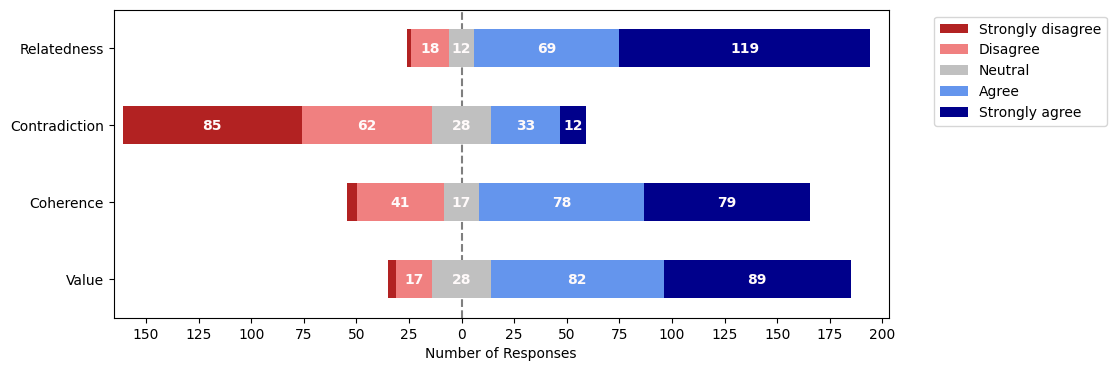

In [11]:
plot_likert.plot_likert(kg_data, likert_values,
    bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral, figsize=(10,4))

In [9]:
no_kg_data = pd.read_csv('no_kg_outputs.tsv', sep='\t')
no_k = no_kg_data.map(lambda x:likert_value_mapping[x])
no_kg_data

,Relatedness,Contradiction,Coherence,Value
0,Disagree,Strongly agree,Disagree,Disagree
1,Strongly agree,Strongly disagree,Agree,Agree
2,Agree,Disagree,Agree,Neutral
3,Strongly agree,Strongly disagree,Strongly agree,Strongly agree
4,Strongly agree,Disagree,Strongly agree,Agree
...,...,...,...,...
215,Disagree,Strongly agree,Strongly disagree,Disagree
216,Disagree,Agree,Disagree,Disagree
217,Strongly agree,Disagree,Neutral,Agree
218,Neutral,Neutral,Neutral,Neutral


In [10]:
for column in no_kg_data.columns:
    print(no_kg_data[column].value_counts())
    print(np.average(no_k[column]), '\n')

Relatedness
Agree                90
Strongly agree       42
Disagree             36
Neutral              29
Strongly disagree    23
Name: count, dtype: int64
3.418181818181818 

Contradiction
Agree                62
Strongly agree       51
Disagree             49
Neutral              41
Strongly disagree    17
Name: count, dtype: int64
3.368181818181818 

Coherence
Disagree             74
Agree                43
Strongly disagree    42
Neutral              40
Strongly agree       21
Name: count, dtype: int64
2.668181818181818 

Value
Disagree             63
Agree                48
Neutral              44
Strongly disagree    39
Strongly agree       26
Name: count, dtype: int64
2.8136363636363635 



/home/manish/miniconda3/envs/data_expl/lib/python3.11/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


<Axes: xlabel='Number of Responses'>

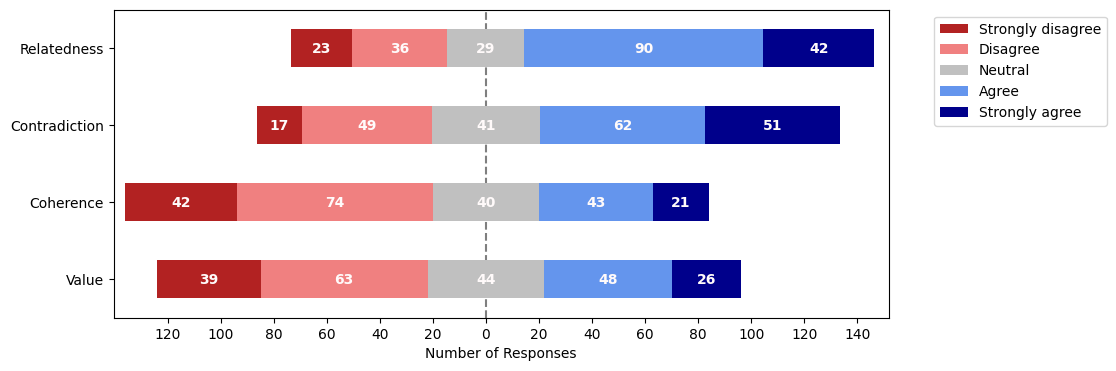

In [14]:
plot_likert.plot_likert(no_kg_data, likert_values,
    bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral, figsize=(10,4))

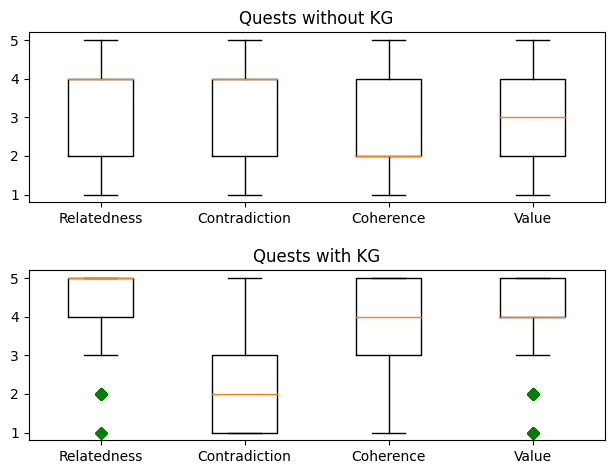

In [15]:
# Multiple box plots on one Axes
fig, ax = plt.subplots(2, 1)

# for _ax in ax:
#     ax.set_xlabel('Criteria')
#     ax.set_ylabel('Observed values')

ax[0].boxplot([no_k[col] for col in columns], 0, 'gD')
ax[0].set_xticklabels(columns)
ax[0].set_title('Quests without KG')

ax[1].boxplot([k[col] for col in columns], 0, 'gD')
ax[1].set_xticklabels(columns)
ax[1].set_title('Quests with KG')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9, hspace=0.4, wspace=0.3)

plt.show()

## Statistical tests for the Likert-scale data

Null and alternate hypothesis:
- $H_0$: Adding KG to the model *does not improve* the generated quests' quality.
- $H_1$: Adding KG to the model *improves* the generated quests' quality.

$\implies$ $H_0$ is rejected if $p < 0.05$.

### Mann-Witney U Test

Assumptions:

- ☑️ **Assumption #1**: Your dependent variable should be measured at the ordinal or continuous level - 5-point likert-scale is ordinal.
- ☑️ **Assumption #2**: Your independent variable should consist of two categorical, independent groups - KG and no-KG.
- ❌ *Assumption #3*: You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves - the generated quests are not independent, as they are generated from the same input.
- ☑️ **Assumption #4**: A Mann-Whitney U test can be used when your two variables are not normally distributed - the generated quests are not normally distributed.

In [16]:
from scipy.stats import mannwhitneyu

U1, mann_p = [], []

for column in columns:
	_U1, _p = mannwhitneyu(no_k[column].to_list(), k[column].to_list(), alternative='less' if column != 'Contradiction' else 'greater')
	U1.append(_U1)
	mann_p.append(_p)

In [17]:
for U, _p, column in zip(U1, mann_p, columns):
	print(f'{column}: U={U:.2f}, p={_p}')

Relatedness: U=13899.00, p=2.030957888528456e-16
Contradiction: U=35794.50, p=2.8584593040741965e-19
Coherence: U=12348.50, p=3.271227965187401e-20
Value: U=11288.50, p=1.1600904904736174e-23


### Wilcoxon Signed-Rank Test

In [11]:
from scipy.stats import wilcoxon

In [12]:
stat, will_p = [], []

for column in columns:
	_stat, _p = wilcoxon(no_k[column].to_list(), k[column].to_list(), alternative='less' if column != 'Contradiction' else 'greater')
	stat.append(_stat)
	will_p.append(_p)

In [13]:
for s, _p, column in zip(stat, will_p, columns):
	print(f'{column}: statistic={s:.2f}, p={_p}')

Relatedness: statistic=2059.00, p=3.3579189515378857e-13
Contradiction: statistic=11637.00, p=3.347535878792185e-16
Coherence: statistic=2455.50, p=1.469166807052385e-15
Value: statistic=1611.50, p=8.341077456810025e-19


### One way ANOVA (Analysis of variance)

In [45]:
from scipy.stats import f_oneway

In [47]:
stat, anova_p = [], []

for column in columns:
	_stat, _p = f_oneway(no_k[column].to_list(), k[column].to_list())
	stat.append(_stat)
	anova_p.append(_p)

In [48]:
for s, _p, column in zip(stat, anova_p, columns):
	print(f'{column}: statistic={s:.2f}, p={_p}')

Relatedness: statistic=67.50, p=2.3973695006029586e-15
Contradiction: statistic=93.60, p=3.411530171822475e-20
Coherence: statistic=102.86, p=7.499624259224752e-22
Value: statistic=129.99, p=1.5121310815197856e-26


In [14]:
print(k.std(), '\n')
print(no_k.std())

Relatedness      0.959917
Contradiction    1.252933
Coherence        1.169303
Value            1.002229
dtype: float64 

Relatedness      1.259715
Contradiction    1.269914
Coherence        1.254721
Value            1.288089
dtype: float64


In [15]:
print(k.mean(), '\n')
print(no_k.mean())

Relatedness      4.295455
Contradiction    2.204545
Coherence        3.840909
Value            4.068182
dtype: float64 

Relatedness      3.418182
Contradiction    3.368182
Coherence        2.668182
Value            2.813636
dtype: float64


In [16]:
print(k.median(), '\n')
print(no_k.median())

Relatedness      5.0
Contradiction    2.0
Coherence        4.0
Value            4.0
dtype: float64 

Relatedness      4.0
Contradiction    4.0
Coherence        2.0
Value            3.0
dtype: float64
